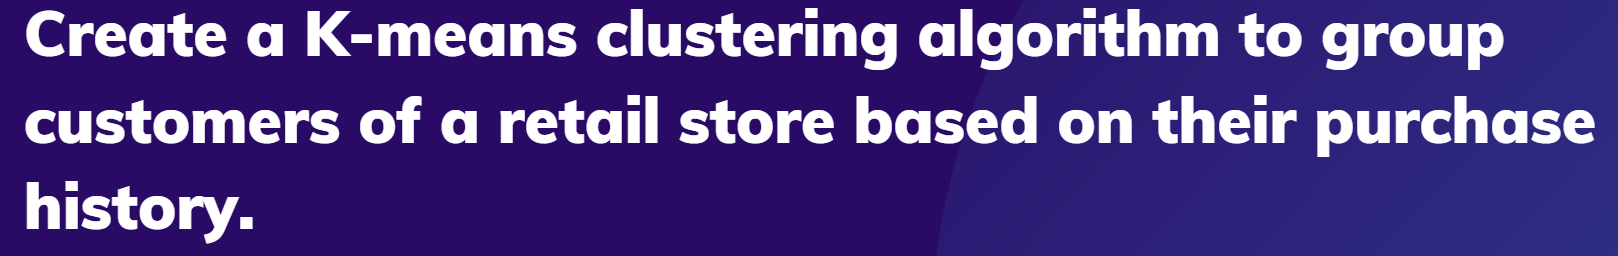

**IMPORT LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from scipy.stats import zscore
import warnings 
warnings.simplefilter('ignore')

**LOADING THE DATASET**

In [2]:
df=pd.read_csv("Mall_Customers.csv")

**EXPLORATORY DATA ANALYSIS**

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

**MODEL BUILDING and VISUALIZATION**

**K-Means Clusterring**

In [8]:
df = df.drop('Gender',axis =1)

In [9]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [10]:
dfScaled = df.apply(zscore)
dfScaled

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


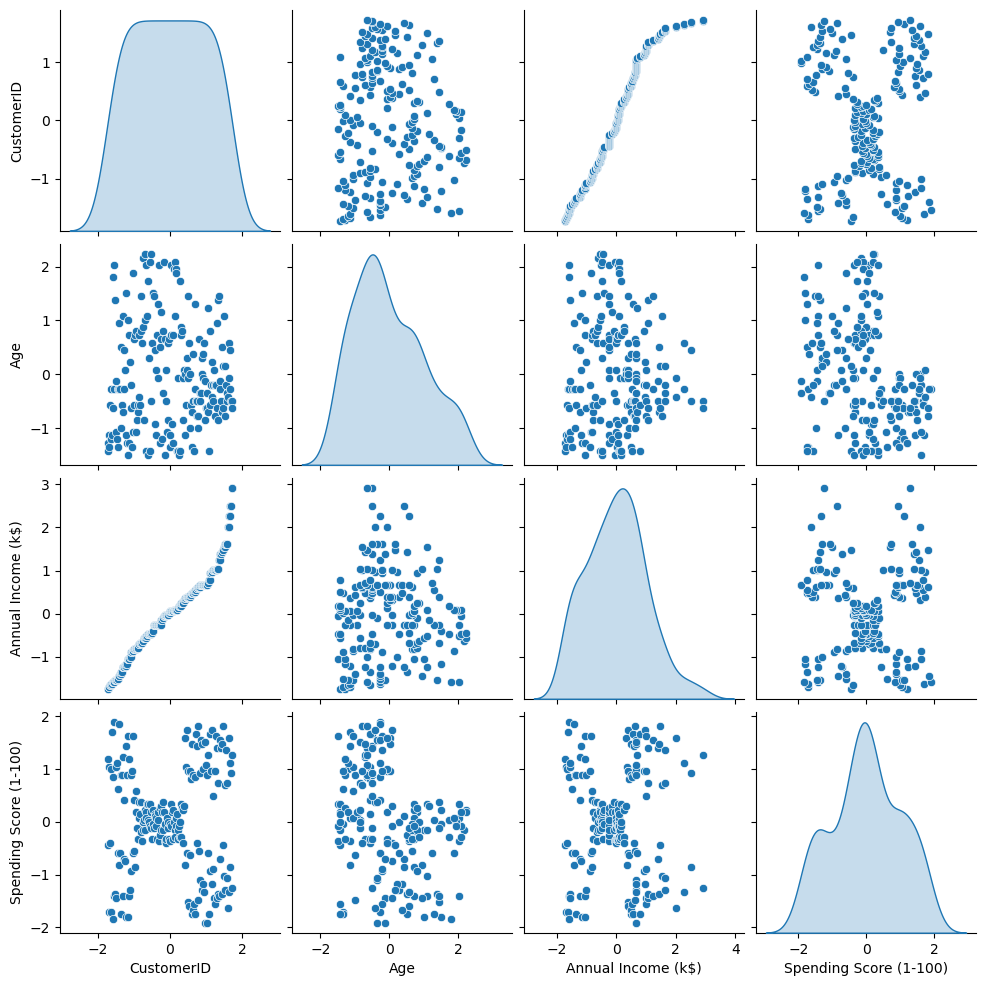

In [11]:
sns.pairplot(dfScaled,diag_kind='kde')

In [12]:
# GROUPING DATA INTO SIMILAR CLUSTERS

In [13]:
# The elbow method 

In [14]:
OMP_NUM_THREADS=1
from scipy.spatial.distance import cdist  # compute distance between each pai of 2 colletion of imputs 
clusters = range(1,100)
meanDistortion=[]


for k in clusters :  
    model = KMeans(n_clusters=k)
    
    model.fit(dfScaled)
    prediction = model.predict(dfScaled)
    
    meanDistortion.append(sum(np.min(cdist(dfScaled,model.cluster_centers_,'euclidean'),axis=1))/dfScaled.shape[0])

In [15]:
meanDistortion

[1.8686813840068113,
 1.5243702543816147,
 1.2829028335107668,
 1.04478270447735,
 0.9434155634136036,
 0.8220517736892176,
 0.7667748625873101,
 0.7347077450306051,
 0.692197897781773,
 0.6654386768451266,
 0.6366314266122158,
 0.6212170073554674,
 0.5804160273248731,
 0.5656923907668613,
 0.5497298671485428,
 0.5379579019086651,
 0.5121958291261248,
 0.5109567545065236,
 0.5065051456481391,
 0.48280285430103625,
 0.47918329169220003,
 0.4709492506939711,
 0.454500326357253,
 0.4402649876135039,
 0.4323895010808675,
 0.4258014639711214,
 0.4218691721612406,
 0.40623504288121226,
 0.4054141062408626,
 0.386048685025735,
 0.38078116444360205,
 0.3814549462810999,
 0.3685853809883695,
 0.3576054207912449,
 0.35752829243504086,
 0.34972705859440417,
 0.34681274699105286,
 0.340075760552343,
 0.3277929470291645,
 0.32746066752195285,
 0.3219905736657781,
 0.31731452555495737,
 0.31354578109645503,
 0.30858774886010737,
 0.3002061846660267,
 0.2964402708509528,
 0.2939965948750906,
 0.28765

Text(0.5, 1.0, 'Selecting k with elbow method')

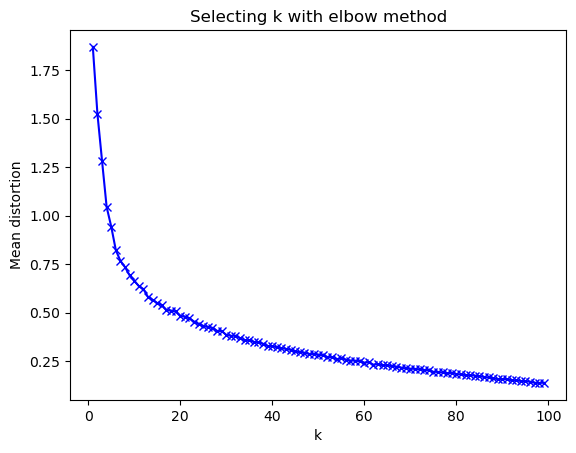

In [16]:
plt.plot(clusters,meanDistortion,'bx-')
plt.xlabel('k')
plt.ylabel('Mean distortion')
plt.title("Selecting k with elbow method")

**MODEL BUILDING**

In [17]:
final_model = KMeans(n_clusters=4, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
final_model.fit(dfScaled)
prediction = final_model.predict(dfScaled)

In [18]:
# Append the prediction 

df['Clusters']= prediction
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [19]:
df['Clusters'].value_counts()

Clusters
0    60
3    59
2    41
1    40
Name: count, dtype: int64

In [20]:
df[df['Clusters'] == 0]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
5,6,22,17,76,0
6,7,35,18,6,0
7,8,23,18,94,0
9,10,30,19,72,0
11,12,35,19,99,0


In [21]:
df[df['Clusters'] == 1].shape

(40, 5)

In [22]:
df[df['Clusters'] == 2]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clusters
120,121,27,67,56,2
122,123,40,69,58,2
123,124,39,69,91,2
125,126,31,70,77,2
127,128,40,71,95,2
129,130,38,71,75,2
131,132,39,71,75,2
133,134,31,72,71,2
135,136,29,73,88,2
137,138,32,73,73,2


In [23]:
from sklearn.metrics import silhouette_score
silhouette_score_average = silhouette_score(dfScaled, final_model.predict(dfScaled))

In [24]:
print(silhouette_score_average)

0.41358360614845524


The silhouette score is a metric used to calculate the goodness of a clustering technique. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

A silhouette score of 0.41358360614845524 is generally considered quite good, especially if it's closer to 1. However, the interpretation of silhouette scores can vary based on the specific data and clustering algorithm used. It's always a good practice to compare the silhouette score obtained with your particular data to scores obtained from random clustering to ensure it is a meaningful measure.